##Dependencies

In [ ]:
import json 
import numpy as np 
from random import choice
from collections import Counter
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Data

In [ ]:
path = '/content/drive/MyDrive/Robosoft-ML/Chatbot/new_intents.json'

In [ ]:
with open(path) as file : 
  data = json.load(file)

In [ ]:
training_sentences = [] 
training_labels = [] 
labels = [] 
responses = [] 

for intent in data['intents'] : 
  for pattern in intent['patterns']:
    training_sentences.append(pattern) 
    training_labels.append(intent['tag'])
  responses.append(intent['responses']) 

  labels.append(intent['tag'])

num_classes = len(labels)


##Data Overview

In [ ]:
print("Labels : " , labels)
print("\nNumber of Classes : " , num_classes)
print("\nTotal Training Sentences : " , len(training_sentences))

Labels :  ['About TRF', 'Greeting', 'Goodbye_Thanks', 'About', 'Robocon', 'Part of TRF ']

Number of Classes :  6

Total Training Sentences :  78


In [ ]:
for i in range(10):
  print(choice(training_sentences))

What is TRF working for?
What are the processes to becoming a TRF member?
TRF Recruitmemt
What are the selection process for the robocon team?
Wonderful Bot
How does TRF recruit?
What is TRF's desire?
Help me in joining TRF
What is your name?
What's the motive of TRF?


In [ ]:
responses

[["The Robotics Forum is VIT Pune's premier robotics club, with a 15-year legacy. Students from various engineering disciplines make up our varied community, all of whom are driven by a passion for robotics. The goal of the team is to gain new skills, explore new technologies, and promote the area of robotics."],
 ['Hello', 'Hi', 'Hi there', ' Hey, how can I help you?'],
 ['See you later',
  'Have a nice day',
  'Bye! Come back again',
  'Happy to help!',
  'Any time!',
  'My pleasure',
  "You're most welcome!"],
 ["I’m XYZ , your TRF assistant bot. I'm a NLP based bot made as a collaboration project of the ML and the Web team.",
  "I'm XYZ, an Artificial Intelligent bot based on NLP. I m here to provide you information about TRF and Robosoft. I was developed by the ML team and deployed by the Web team."],
 ['TRF participates in the ABU Robocon every year. In this competition robots built by different teams compete to perform a given task within a time frame. Anyone who is a member of 

In [ ]:
labels.sort()
labels

['About', 'About TRF', 'Goodbye_Thanks', 'Greeting', 'Part of TRF ', 'Robocon']

In [ ]:
label_instances = Counter(training_labels)
label_instances

Counter({'About': 9,
         'About TRF': 15,
         'Goodbye_Thanks': 18,
         'Greeting': 12,
         'Part of TRF ': 14,
         'Robocon': 10})

In [ ]:
count_ins = [] 

for i in labels : 
  count_ins.append(label_instances[i])

count_ins 

[9, 15, 18, 12, 14, 10]

##Data Analysis

In [ ]:
training_df = pd.DataFrame(training_sentences , columns = ['text'])

In [ ]:
training_df.head()

,text
0,What is TRF?
1,What's the motive of TRF?
2,What exactly is TRF?
3,What specifically is TRF?
4,What necessarily is TRF?


Label Wise Count

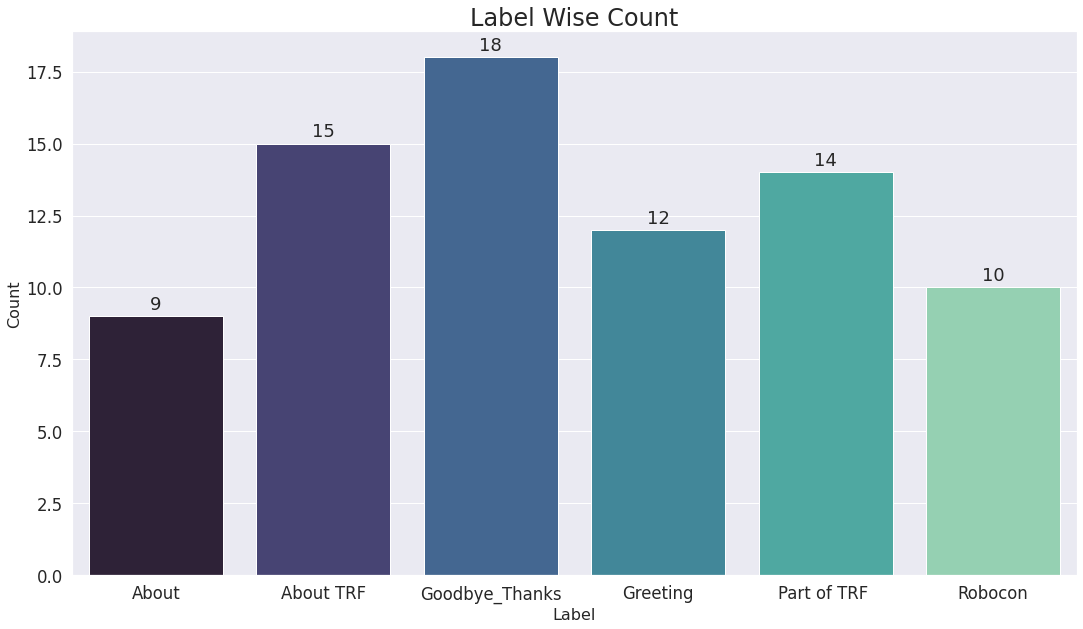

In [ ]:
sns.set(font_scale = 1.5) 
plt.figure(figsize = (18,10)) 

ax= sns.barplot(x = labels, y = count_ins , palette = 'mako')

plt.title("Label Wise Count", fontsize=24)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Label', fontsize=16)

rects = ax.patches

for rect, label in zip(rects, count_ins):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom', fontsize=18)

plt.show()


Training Sentence Length

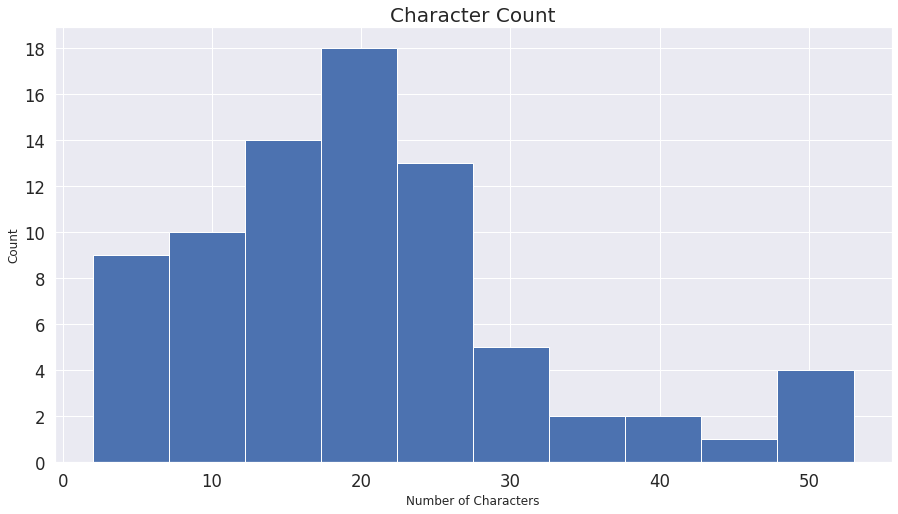

In [ ]:
# number of characters in each sentence
char_len = training_df['text'].str.len()
plt.figure(figsize=(15,8))
plt.yticks(range(0,20,2))
plt.hist(char_len )
plt.title("Character Count", fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Characters', fontsize=12)
plt.show()

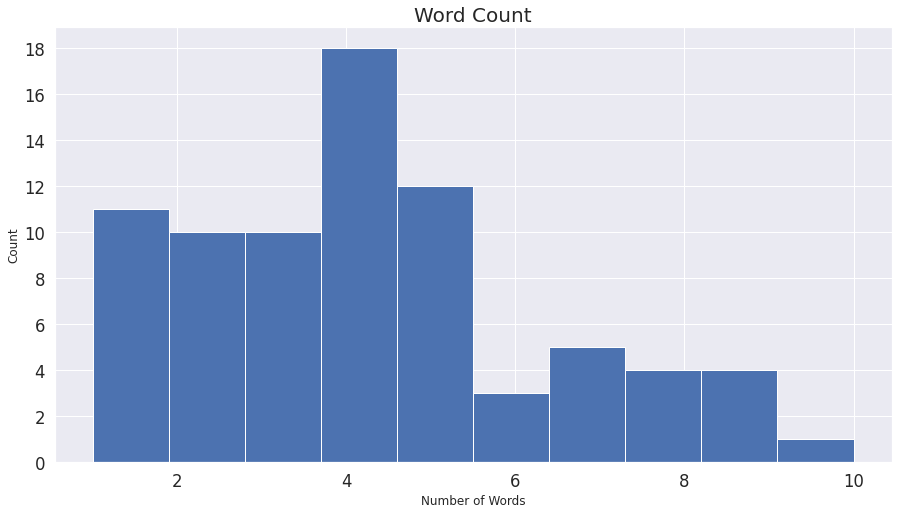

In [ ]:
word_len = (training_df['text'].str.split().map(lambda x : len(x)))


plt.figure(figsize=(15,8))
plt.yticks(range(0,20,2))
plt.hist(word_len)
plt.title("Word Count", fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Words', fontsize=12)
plt.show()